## 'Lesson 4: Annotating and Saving'

https://www.coursera.org/learn/data-analysis-r/quiz/NEmsh/hands-on-activity-annotating-and-saving-visualizations/attempt

---

## Background for this activity

In this activity, you'll review a scenario, and practice adding annotations to a data visualization with ggplot2. You will also learn how to save images from ggplot2 visualizations so that you can add them directly to presentations. 

Throughout this activity, you will also have the opportunity to practice writing your own code by making changes to the code chunks yourself. If you encounter an error or get stuck, you can always check the Lesson4_Annotations_Solutions .rmd file in the Solutions folder under Week 4 for the complete, correct code. 

## The Scenario

As a junior data analyst for a hotel booking company, you have been creating visualizations in `R` with the `ggplot2`  package to share insights about your data with stakeholders. After creating a series of visualizations using `ggplot()`, `ggplot2` aesthetics, and filters, your stakeholder asks you to add annotations to your visualizations to help explain your findings in a presentation. Luckily, `ggplot2` has annotation functions built in.  

## Step 1: Import your data

If you haven't exited out of RStudio since importing this data last time, you can skip these steps. Rerunning these code chunks won't affect your console if you want to run them just in case, though.  

If this line causes an error, copy in the line setwd("projects/Course 7/Week 4") before it.

Run the code below to read in the file 'hotel_bookings.csv' into a data frame: 

```{r load data}
hotel_bookings <- read.csv("hotel_bookings.csv")
```

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv')

## Step 2: Refresh Your Memory

By now, you are pretty familiar with this data set. But you can refresh your memory with the `head()` and `colnames()` functions. Run two code chunks below to get at a sample of the data and also preview all the column names:

```{r look at data}
head(hotel_bookings)
```

```{r look at column names}
colnames(hotel_bookings)
```

In [2]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel_bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Step 3: Install and load the 'ggplot2' and 'tidyverse' packages (optional)

If you haven't already installed and loaded the `ggplot2` package, you will need to do that before you can use the `ggplot()` function. You only have to do this once though, not every time you call `ggplot()`.

You can also skip this step if you haven't closed your RStudio account since doing the last activity. If you aren't sure, you can run the code chunk and hit 'cancel' if the warning message pops up telling you that have already downloaded the `ggplot2` package.

Run the code chunk below to install and load `ggplot2`. This may take a few minutes!

```{r loading and installing ggplot2, echo=FALSE, message=FALSE}
install.packages('ggplot2')
library(ggplot2)
```

If you haven't installed and loaded tidyverse in this RStudio session, you can run the code chunk below. This may take a few minutes!

```{r install and download tidyverse}
install.packages('tidyverse')
library(tidyverse)
```

In [5]:
import seaborn as sns

## Step 4: Annotating your chart

Your stakeholder tells you that they would like you to share they visualization breaking down payment type by city because it will help inform how the company targets promotions in the future. They ask you to create a cleaned and labeled version and save it as a .png file for them to include in a presentation. 

As a refresher, here is the chart you created before:
```{r faceting a plot}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = market_segment)) +
  facet_wrap(~hotel)
```

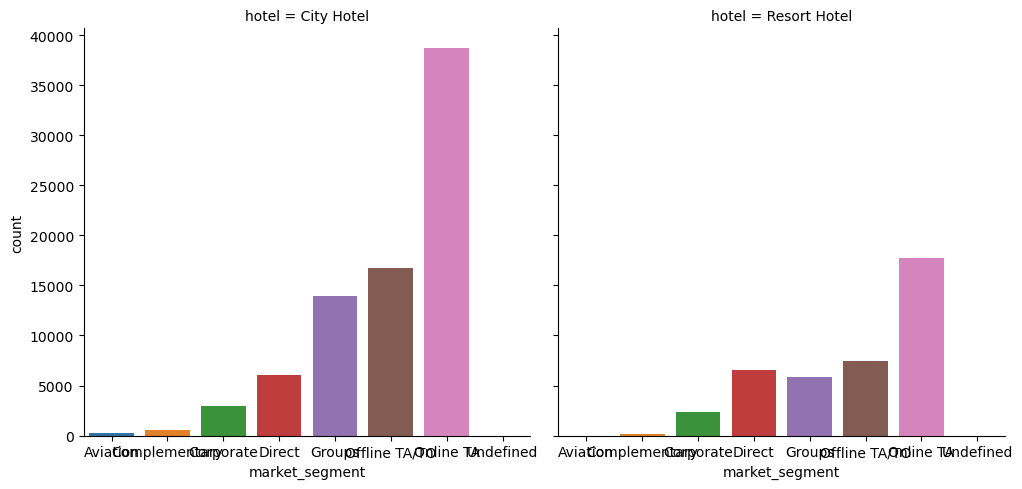

In [6]:
hotel_grouped = hotel_bookings.groupby(['hotel', 'market_segment']).size().reset_index(name='count')

sns.catplot(data=hotel_grouped, x="market_segment", y="count", kind="bar", col="hotel", col_wrap=3)

This creates two bar graphs: one for 'city_hotel' data and one for 'resort_hotel' data. The x axis is 'market_segment' and the y axis is 'count' for both charts. 

In this visualization it is unclear where the data is from, what the main takeaway is, or even what the data is showing. To explain all of that, you can leverage annotations in `ggplot2`.

The first step will be adding a title; that is often the first thing people will pay attention to when they encounter a data visualization for the first time. To add a title, you will add `labs()` at the end of your `ggplot()` command and then input a title there. Add a descriptive title to the code chunk below: 

```{r faceting a plot with a title}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = market_segment)) +
  facet_wrap(~hotel) +
  labs(title="")
```

In [7]:
import matplotlib.pyplot as plt

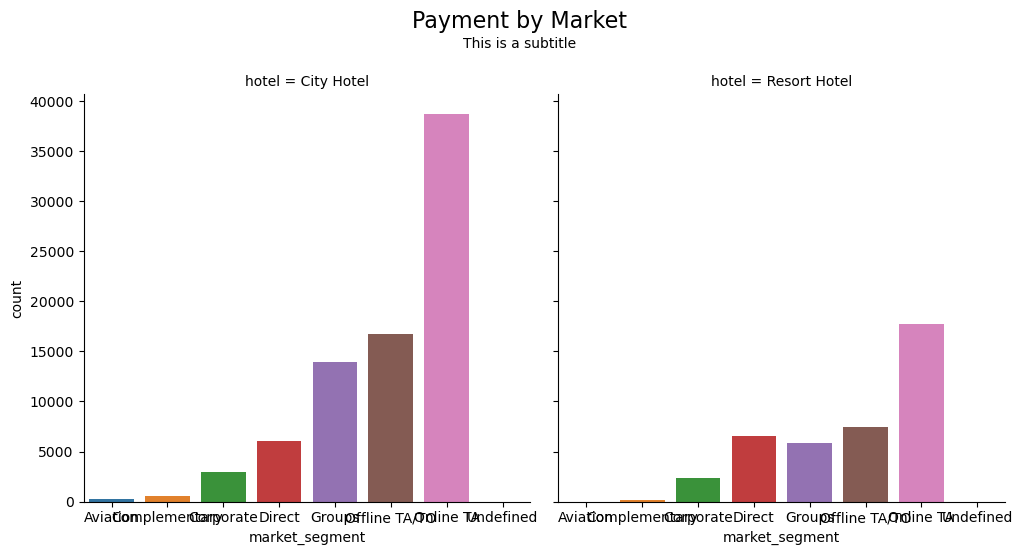

In [11]:
ax = sns.catplot(data=hotel_grouped, x="market_segment", y="count", kind="bar", col="hotel", col_wrap=3)

ax.fig.suptitle("Bookings by City", x = 0.35, y = 1.1, fontsize = 16)  # Overall Title
ax.fig.text(x=0.35, y=1.025, horizontalalignment='center', s="This is a subtitle")  # Subtitle

plt.show()

This code chunk will generate the same chart as before, but now it includes a title to explain the data visualization more clearly to your audience. 

You also want to add another detail about what time period this data covers. To do this, you need to find out when the data is from. 

You realize you can use the `min()` function on the year column in the data:

```{r earliest year}
min(hotel_bookings$arrival_date_year)
```
 
And the `max()` function:
```{r latest year}
max(hotel_bookings$arrival_date_year)
```

But you will need to save them as variables in order to easily use them in your labeling; the following code chunk creates two of those variables: 
```{r latest date}
mindate <- min(hotel_bookings$arrival_date_year)
maxdate <- max(hotel_bookings$arrival_date_year)
```

Now, you will add in a subtitle using `subtitle=` in the `labs()` function. Then, you can use the `paste0()` function to use your newly-created variables in your labels. This is really handy, because if the data gets updated and there is more recent data added, you don't have to change the code below because the variables are dynamic:

```{r city bar chart with timeframe}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = market_segment)) +
  facet_wrap(~hotel) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title="Comparison of market segments by hotel type for hotel bookings",
       subtitle=paste0("Data from: ", mindate, " to ", maxdate))
```

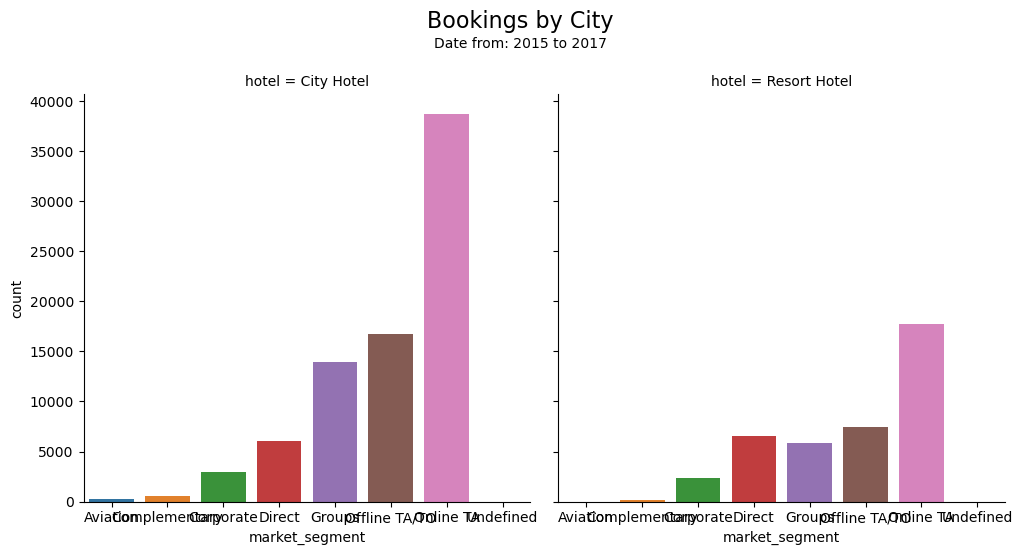

In [18]:
mindate = hotel_bookings['arrival_date_year'].min()
maxdate = hotel_bookings['arrival_date_year'].max()

ax = sns.catplot(data=hotel_grouped, x="market_segment", y="count", kind="bar", col="hotel", col_wrap=3)

ax.fig.suptitle("Bookings by City", x = 0.35, y = 1.1, fontsize = 16)  # Overall Title
ax.fig.text(x=0.35, y=1.025, horizontalalignment='center', s="Date from: " + f'{mindate}' + " to " + f'{maxdate}')  # Subtitle

plt.show()



This code chunk will add the subtitle 'Data from: 2015 to 2017' underneath the title you added earlier to the chart. 

You realize that this chart is displaying the technical details a little too prominently. You don't want that to be the second thing people notice during the presentation. You decide to switch the `subtitle`  to a `caption` which will appear in the bottom right corner instead.

```{r city bar chart with timeframe as caption}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = market_segment)) +
  facet_wrap(~hotel) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title="Comparison of market segments by hotel type for hotel bookings",
       caption=paste0("Data from: ", mindate, " to ", maxdate))
```

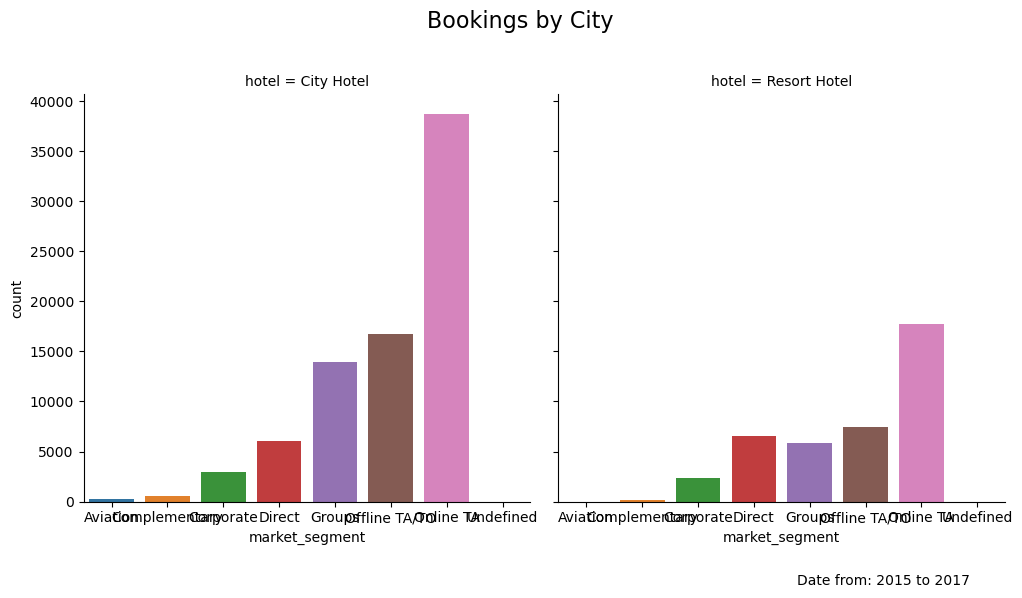

In [27]:
ax = sns.catplot(data=hotel_grouped, x="market_segment", y="count", kind="bar", col="hotel", col_wrap=3)

ax.fig.suptitle("Bookings by City", x = 0.35, y = 1.1, fontsize = 16)  # Overall Title
ax.fig.text(x=0.65, y=-0.05, horizontalalignment='right', s="Date from: " + f'{mindate}' + " to " + f'{maxdate}')  # Caption 

plt.show()

This code chunk makes a slight change to the visualization you created in the last chunk; now the "data from: 2015 to 2017" subtitle is in the bottom right corner. 

Now you want to clean up the x and y axis labels to make sure they are really clear. To do that, you can add to the `labs()` function and use `x=` and `y=`. Feel free to change the text of the label and play around with it:

```{r city bar chart with x and y axis}
ggplot(data = hotel_bookings) +
  geom_bar(mapping = aes(x = market_segment)) +
  facet_wrap(~hotel) +
  theme(axis.text.x = element_text(angle = 45)) +
  labs(title="Comparison of market segments by hotel type for hotel bookings",
       caption=paste0("Data from: ", mindate, " to ", maxdate),
       x="Market Segment",
       y="Number of Bookings")
```

(I'm gonna do one more thing and that is rotating the x-axis lable so the texts are not overlapping.)

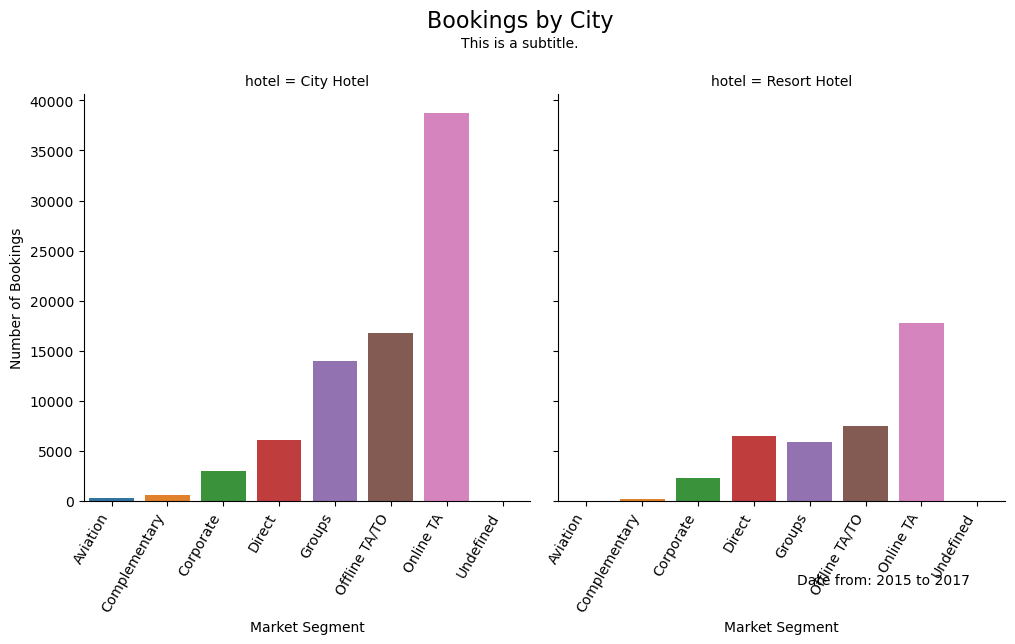

In [38]:
ax = sns.catplot(data=hotel_grouped, x="market_segment", y="count", kind="bar", col="hotel", col_wrap=3)

ax.fig.suptitle("Bookings by City", x = 0.35, y = 1.1, fontsize = 16)  # Overall Title
ax.fig.text(x=0.35, y=1.025, horizontalalignment='center', s="This is a subtitle.")  # Subtitle
ax.fig.text(x=0.65, y=-0.05, horizontalalignment='right', s="Date from: " + f'{mindate}' + " to " + f'{maxdate}')  # Caption
ax.set(xlabel='Market Segment', ylabel='Number of Bookings')
ax.set_xticklabels(rotation=60, horizontalalignment='right')

plt.show()

Now you have the data visualization from earlier, but now the x and y axis labels have been changed from 'market_segment' and 'count' to 'Market Segment' and 'Number of Bookings' so that the chart is clearer. 

## Step 5: Saving your chart

Now, it's time to save what you just created so you can easily share with stakeholders.

You can use the `ggsave()` function to do just that! It will save your image as a 7x7 at the file path you input by default, which makes it simple to export your plots from R.  

The `ggsave()` function in the code chunk below will save the last plot that was generated, so if you ran something after running the code chunk above, run that code chunk again. 

Then run the following code chunk to save that plot as a .png file named `hotel_booking_chart`, which makes it clear to your stakeholders what the .png file contains. Now you should be able to find this file in your 'Files' tab in the bottom right of your screen. Check it out!

```{r save your plot}
ggsave('hotel_booking_chart.png')
```

In [36]:
ax.figure.savefig("Lesson4_save_output.png")